In [54]:

#Importing some of essential libreries 
import pandas as pd
import numpy as np
import time

#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import itertools

from sklearn.ensemble import RandomForestClassifier

### Loading The Source Data 

In [55]:
df=pd.read_csv("telecom_churn_data.csv")
print("The Total No of Rows and Columns in Our DataSet: ", df.shape)
df.head(2)

The Total No of Rows and Columns in Our DataSet:  (99999, 226)


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362

In [56]:
# Checking the informations regarding the dataset
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [57]:
# Analysis of the numercial features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


### Checking % of Null Value in Dataset

In [90]:
def null_val(df):
    null_df = pd.DataFrame({"cnt": df.isnull().sum(), 
                        "%value": round(df.isnull().sum()/len(df)*100,2)}).sort_values(by="cnt", ascending = False)
null_val(df)

We have have multiple features with around 75% of Nan values and rest all having null values ranging from 7 to 1 % 

### Checking Unique Value in each features : 


We have observed that  "mobile_number","circle_id" has the high cardinality hence droping the variables it will not add any imporatnce to our model

In [59]:
## "mobile_number","circle_id" has the high cardinality hence droping the variable 
df = df.drop(["mobile_number","circle_id"],axis=1)

Extarcting and droping list of features having a single unique value, it does not add nay significance to model hence droping those variables !

In [60]:

unique_val_list=[]

for i in df.columns:
    if df[i].nunique()==1:
        unique_val_list.append(i)
        
    
print("List of Features having unique value and NAN :\n\n",unique_val_list)

List of Features having unique value and NAN :

 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [61]:
def unique_val(col_list):
    for column in col_list:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(str(column)+ "=> Total Counts of each unique Value  : \n",df[column].value_counts())
        print("_________________________________________________________________\n")

# unique_val(df.columns)

In [62]:
## Let just print Unique Value List withing Unique value Features before droping them 
unique_val(unique_val_list)

loc_og_t2o_mou : [ 0. nan]
loc_og_t2o_mou=> Total Counts of each unique Value  : 
 0.0    98981
Name: loc_og_t2o_mou, dtype: int64
_________________________________________________________________

std_og_t2o_mou : [ 0. nan]
std_og_t2o_mou=> Total Counts of each unique Value  : 
 0.0    98981
Name: std_og_t2o_mou, dtype: int64
_________________________________________________________________

loc_ic_t2o_mou : [ 0. nan]
loc_ic_t2o_mou=> Total Counts of each unique Value  : 
 0.0    98981
Name: loc_ic_t2o_mou, dtype: int64
_________________________________________________________________

last_date_of_month_6 : ['6/30/2014']
last_date_of_month_6=> Total Counts of each unique Value  : 
 6/30/2014    99999
Name: last_date_of_month_6, dtype: int64
_________________________________________________________________

last_date_of_month_7 : ['7/31/2014' nan]
last_date_of_month_7=> Total Counts of each unique Value  : 
 7/31/2014    99398
Name: last_date_of_month_7, dtype: int64
_________________

If any of the feature having a single value in it, will not add any imporatnce to our prediction model. 
all the features having a sigle value in more than 90K records which can be removed from our dataset for further ananlysis

In [63]:
df.drop(df[unique_val_list],axis= 1, inplace=True)
df.shape

(99999, 209)

### Categorica Feature: 
"total_rech_data_6","date_of_last_rech_data_6",'av_rech_amt_data_6','max_rech_data_6' etc....

Let us print the data set to understand the relation between them 

In [64]:
df[["total_rech_data_6", "date_of_last_rech_data_6",'av_rech_amt_data_6','max_rech_data_6',
    "total_rech_data_7", "date_of_last_rech_data_7",'av_rech_amt_data_7','max_rech_data_7',
    "total_rech_data_8", "date_of_last_rech_data_8",'av_rech_amt_data_8','max_rech_data_8',
    "total_rech_data_9", "date_of_last_rech_data_9",'av_rech_amt_data_9','max_rech_data_9',]].head(20)

,total_rech_data_6,date_of_last_rech_data_6,av_rech_amt_data_6,max_rech_data_6,total_rech_data_7,date_of_last_rech_data_7,av_rech_amt_data_7,max_rech_data_7,total_rech_data_8,date_of_last_rech_data_8,av_rech_amt_data_8,max_rech_data_8,total_rech_data_9,date_of_last_rech_data_9,av_rech_amt_data_9,max_rech_data_9
0,1.0,6/21/2014,252.0,252.0,1.0,7/16/2014,252.0,252.0,1.0,8/8/2014,252.0,252.0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,7/25/2014,154.0,154.0,2.0,8/10/2014,50.0,25.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9/17/2014,46.0,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,6/4/2014,56.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,2.0,7/31/2014,177.0,154.0,3.0,8/23/2014,69.0,23.0,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,1.0,7/23/2014,154.0,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


date_of_last_rech is the date column, We can identify from obove is user have not donr any recharge hence if the date col is null the rest of total_recg, av_rech is going to be zero hence we can impute a 0 value at place of NaN

In [65]:
null_col = ["total_rech_data_6",'av_rech_amt_data_6','max_rech_data_6',
            "total_rech_data_7", 'av_rech_amt_data_7','max_rech_data_7',
            "total_rech_data_8", 'av_rech_amt_data_8','max_rech_data_8',
            "total_rech_data_9", 'av_rech_amt_data_9','max_rech_data_9']
df[null_col] = df[null_col].apply(lambda x: x.fillna(0))

In [66]:
print("The Total Null value after null imputation in above list of features:", df[null_col].isnull().sum().sum()) 

The Total Null value after null imputation in above list of features: 0


In [67]:
cat_col=(df.select_dtypes(include = "object")).columns
print("List of Categorical Columns Present in dataset: ",cat_col)

List of Categorical Columns Present in dataset:  Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')


We already have feature name by which we can identify the last_rech period. hence no need of date column fo further analysis

In [68]:
df = df.drop(cat_col,axis=1)
df.shape

(99999, 201)

All the night pack and Fb User features shows that the User either opted Night Pack or FB pack if not than it shows user has not opted for the those feature pack.
Hence we can replace nan with -1 value

In [69]:
df[["night_pck_user_6","fb_user_6",
    "night_pck_user_7","fb_user_7",
    "night_pck_user_8","fb_user_8",
    "night_pck_user_9","fb_user_9"]].head(20)

,night_pck_user_6,fb_user_6,night_pck_user_7,fb_user_7,night_pck_user_8,fb_user_8,night_pck_user_9,fb_user_9
0,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN
1,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN
9,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN


### Imputing Null Values

Extracting list of features

In [70]:
cat_cols = ["night_pck_user_6","fb_user_6","night_pck_user_7","fb_user_7","night_pck_user_8","fb_user_8", "night_pck_user_9","fb_user_9"]

In [71]:
null_col = ['count_rech_3g_6','max_rech_data_6','arpu_3g_6','total_rech_data_6','count_rech_2g_6','arpu_2g_6',
            'count_rech_3g_7','max_rech_data_7','arpu_3g_7','total_rech_data_7','count_rech_2g_7','arpu_2g_7',
            'count_rech_3g_8','max_rech_data_8','arpu_3g_8','total_rech_data_8','count_rech_2g_8','arpu_2g_8']

User who have max_rech_data is 0 their count of recharge and and avg Revenue will also should be zero hence can be replace by 0

In [72]:
df[null_col] = df[null_col].apply(lambda x: x.fillna(0))
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [20]:
df = df.drop(["count_rech_3g_9","count_rech_2g_9","arpu_3g_9","arpu_2g_9"],axis=1)
null_val(df)

In [73]:
df = df.loc[:,df.isnull().mean()<=0.7]
df.shape

(99999, 197)

Now we have around 197 No of Features lets look at the null values 

### NaN Imputance 

In [88]:
churn_cols = df.columns

# using MICE technique to impute missing values in the rest of the columns
from fancyimpute import IterativeImputer as MICE
churn_imputed = MICE().fit_transform(df)
df = pd.DataFrame(churn_imputed, columns=churn_cols)

In [89]:
null_val(df)

### High Value Customers
Customer have done average recharge amount for 6 and 7 month and which is greater than the 70th percentile will be considered as a high value custome

In [91]:
# Get the average recharge amount for 6 and 7 month and greater than 70th percentile of average recharge amount
df['avg_rech_'] = ( df['total_rech_amt_6'] + df['total_rech_amt_7'] ) / 2
df = df.loc[(df['avg_rech_'] > np.percentile(df['avg_rech_'], 70))]
# drop the average column
df.drop(['avg_rech_'], axis=1, inplace=True)

print(df.shape)

(8975, 198)


### Target Variable
Extracting churn variable from the below variable if the sum of the total mou and vol of 9 month is 0 than the customer is considered as a churn customer

In [92]:
target_col = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']
df['churn'] = np.where(df[target_col].sum(axis=1) == 0, 1, 0 )

Churn Rate : 90.84%
Churn Rate : 9.16%


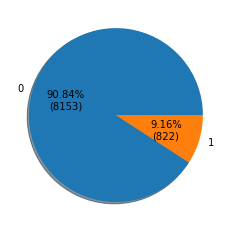

In [93]:
def per_val(x):
    
    print('Churn Rate : {0}%'.format(round(x,2)))
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

v_counts = df['churn'].value_counts()
total = len(df['churn'])
fig = plt.figure()
plt.pie(v_counts, labels=v_counts.index, autopct=per_val, shadow=True)
plt.show()

### Delete all featurs related  to 9th month

In [94]:
df = df.filter(regex='[^9]$', axis=1)
df.shape

(8975, 153)

In [95]:
# extract all names that end with 9
col_9_names = df.filter(regex='9$', axis=1).columns

cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in df.columns if col not in cat_cols]

### K-sigma Technique fo Cap outliers in all Numerical Variables 

In [96]:
def k_sigma(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", k_sigma(sample_array, k=2))
df[num_cols] = df[num_cols].apply(k_sigma, axis=0)

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [97]:
df.shape

(8975, 153)

## Incoming Calls Usage

In [98]:
c_list = [['loc_ic_mou_6','std_ic_mou_6','isd_ic_mou_6','roam_ic_mou_6','spl_ic_mou_6','ic_others_6','total_ic_mou_6'],
        ['loc_ic_mou_7','std_ic_mou_7','isd_ic_mou_7','roam_ic_mou_7','spl_ic_mou_7','ic_others_7','total_ic_mou_7'],
        ['loc_ic_mou_8','std_ic_mou_8','isd_ic_mou_8','roam_ic_mou_8','spl_ic_mou_8','ic_others_8','total_ic_mou_8']]

# plot for the incoming calls usage
def plt_boxplt(col):
    for i in range(0,len(c_list)):
        plt.figure(figsize=(8, 7))
        X = pd.concat([df[col[i]], df['churn']], axis=1)
        X = pd.melt(X,id_vars="churn",var_name="features",value_name='value')
        sns.boxplot(x="features", y="value", hue="churn", data=X, palette="pastel")
#         sns.swarmplot(x="features", y="value", data=X, color=".25")
        plt.xticks(rotation=45)    
 

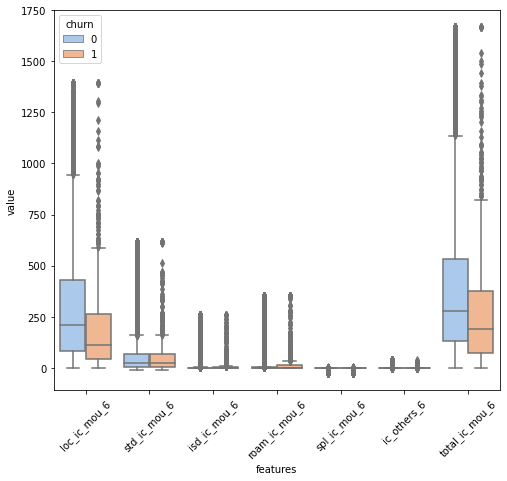

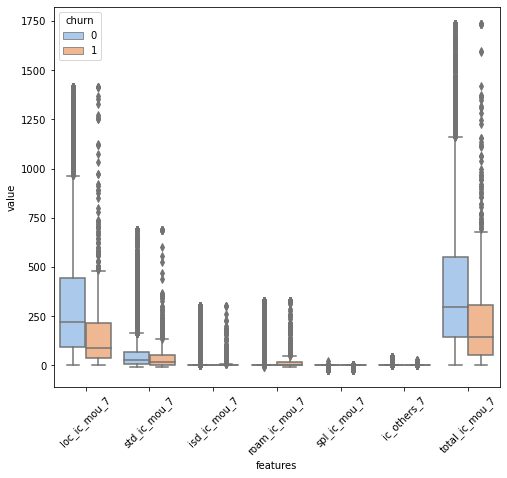

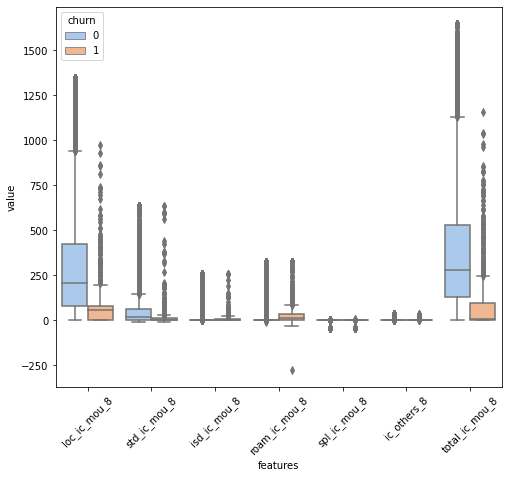

In [99]:
plt_boxplt(c_list)

### Recharge and Avg Revenue Usage

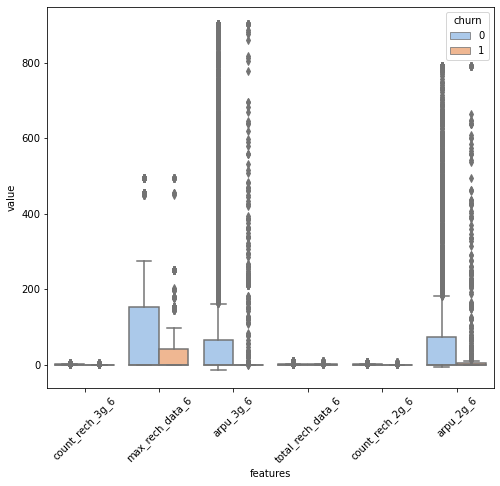

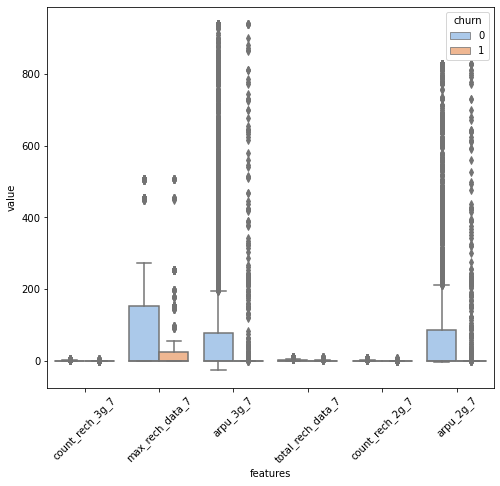

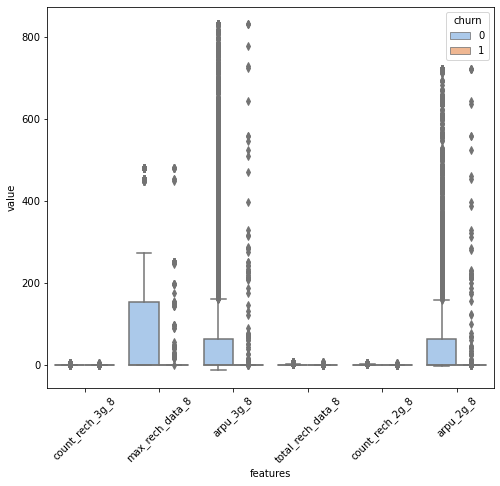

In [100]:
c_list = [['count_rech_3g_6','max_rech_data_6','arpu_3g_6','total_rech_data_6','count_rech_2g_6','arpu_2g_6'],
            ['count_rech_3g_7','max_rech_data_7','arpu_3g_7','total_rech_data_7','count_rech_2g_7','arpu_2g_7'],
            ['count_rech_3g_8','max_rech_data_8','arpu_3g_8','total_rech_data_8','count_rech_2g_8','arpu_2g_8']]
plt_boxplt(c_list)

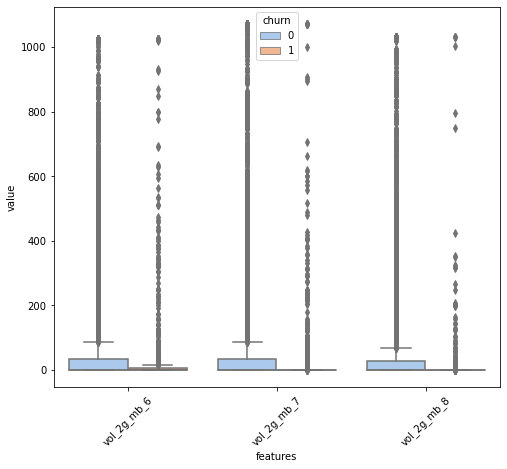

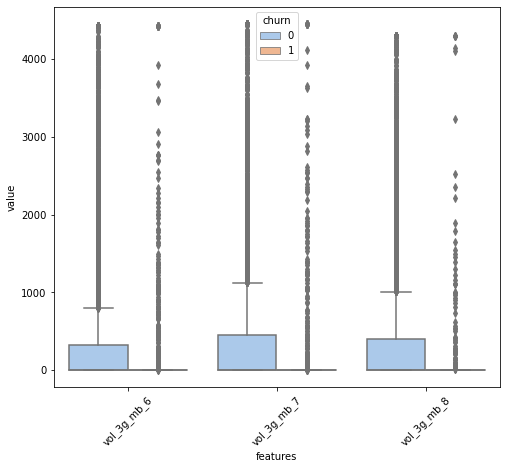

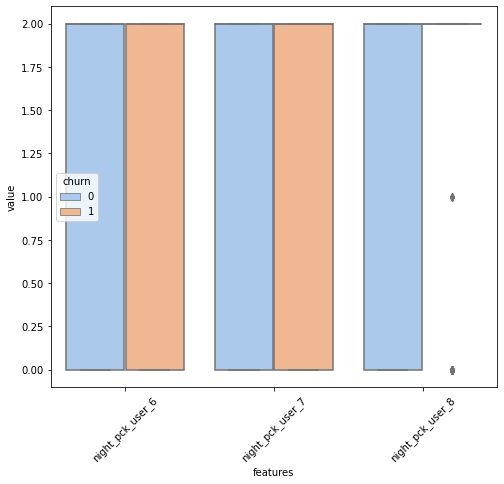

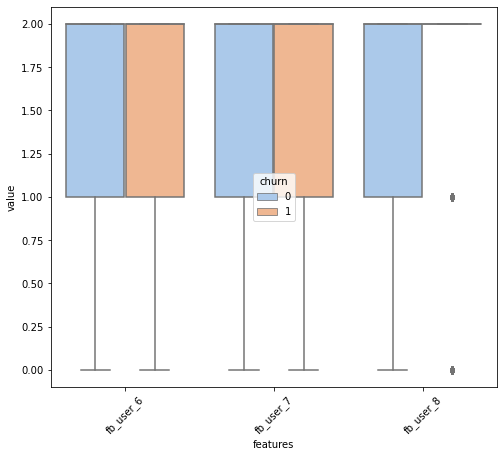

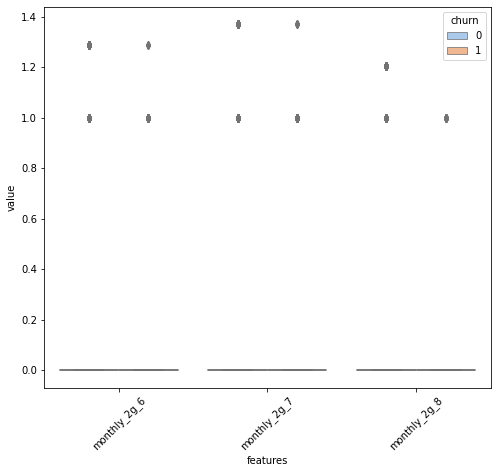

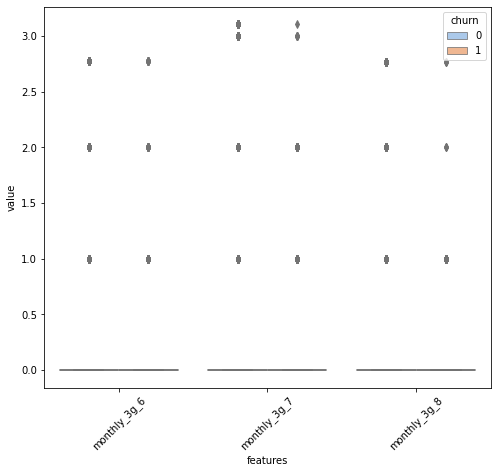

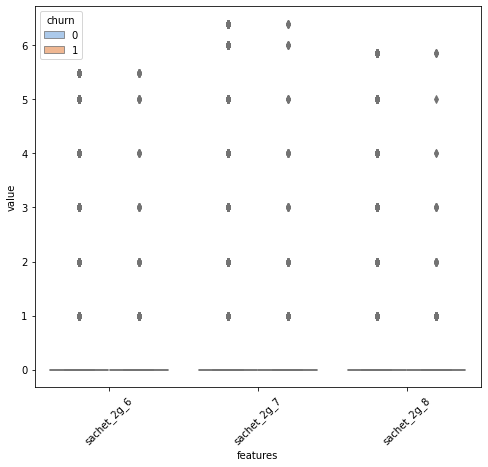

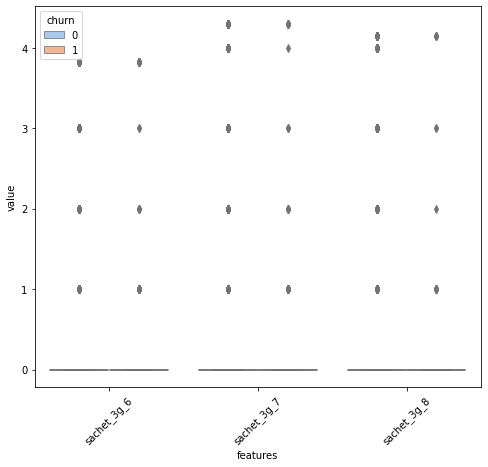

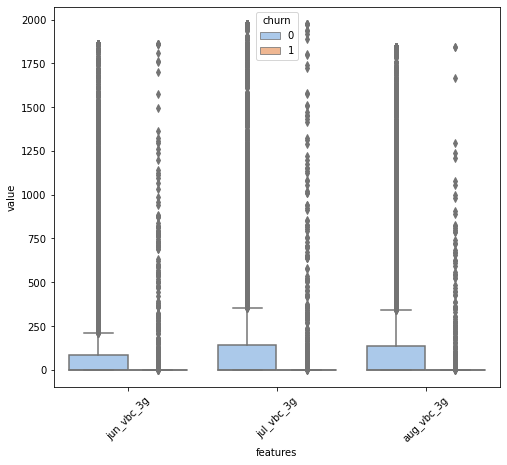

In [101]:
c_list = [['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8'],
        ['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'],
        ['night_pck_user_6','night_pck_user_7','night_pck_user_8'],
        ['fb_user_6','fb_user_7','fb_user_8'],
        ['monthly_2g_6','monthly_2g_7','monthly_2g_8'],
        ['monthly_3g_6','monthly_3g_7','monthly_3g_8'],
        ['sachet_2g_6','sachet_2g_7','sachet_2g_8'],
        ['sachet_3g_6','sachet_3g_7','sachet_3g_8'],
        ['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g']]
plt_boxplt(c_list)

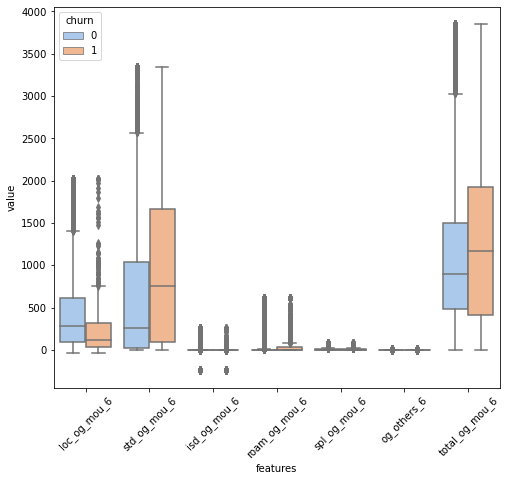

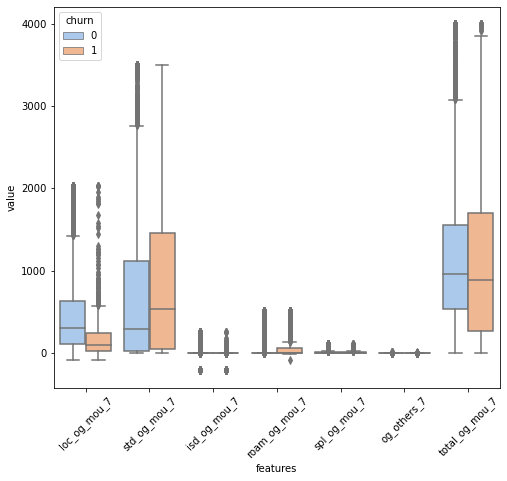

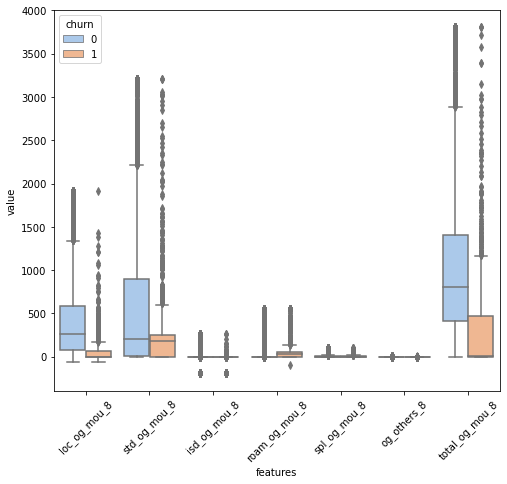

In [102]:
c_list = [['loc_og_mou_6','std_og_mou_6','isd_og_mou_6','roam_og_mou_6','spl_og_mou_6','og_others_6','total_og_mou_6'],
        ['loc_og_mou_7','std_og_mou_7','isd_og_mou_7','roam_og_mou_7','spl_og_mou_7','og_others_7','total_og_mou_7'],
        ['loc_og_mou_8','std_og_mou_8','isd_og_mou_8','roam_og_mou_8','spl_og_mou_8','og_others_8','total_og_mou_8']]
plt_boxplt(c_list)

In [103]:
yes_churn_df = (df[df['churn']==1]).copy()
no_churn_df = (df[df['churn']==0]).copy()
def plt_distplot(col):
    plt.figure(figsize=(10,8))
    sns.distplot(yes_churn_df[col], hist=True, kde=True, 
                 bins=20, color = 'red', 
                 kde_kws = {'shade': True, 'linewidth': 2})

    sns.distplot(no_churn_df[col], hist=True, kde=True, 
                 bins=20, color = 'blue',  
                 kde_kws = {'shade': True, 'linewidth': 2})

    plt.show()

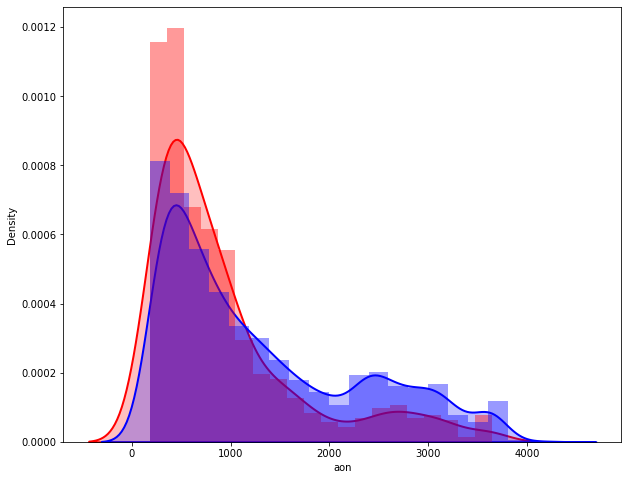

In [104]:
plt_distplot("aon")

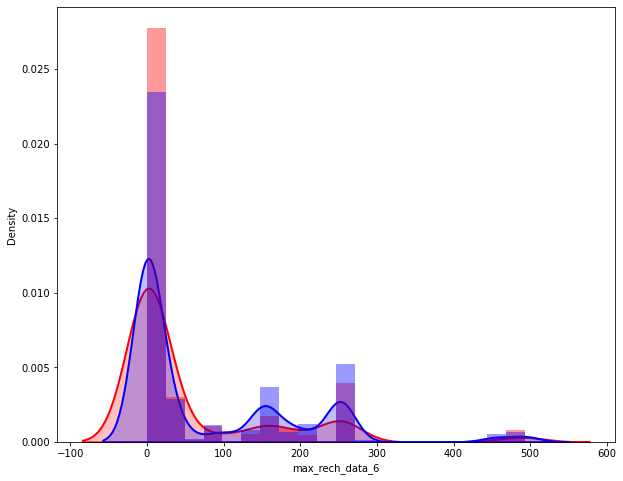

In [105]:
plt_distplot("max_rech_data_6")

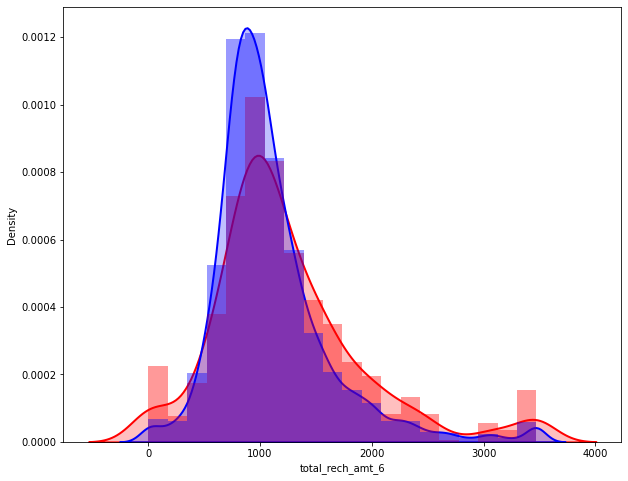

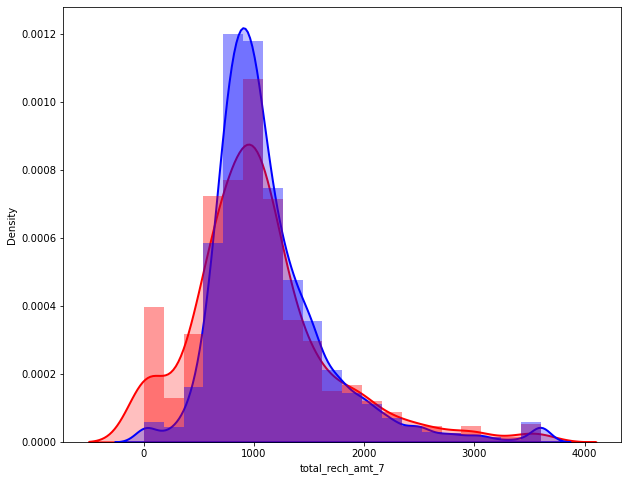

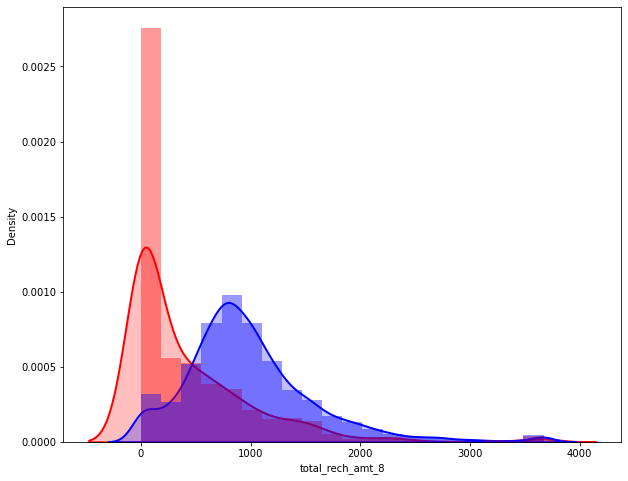

In [106]:
plt_distplot("total_rech_amt_6")
plt_distplot("total_rech_amt_7")
plt_distplot("total_rech_amt_8")

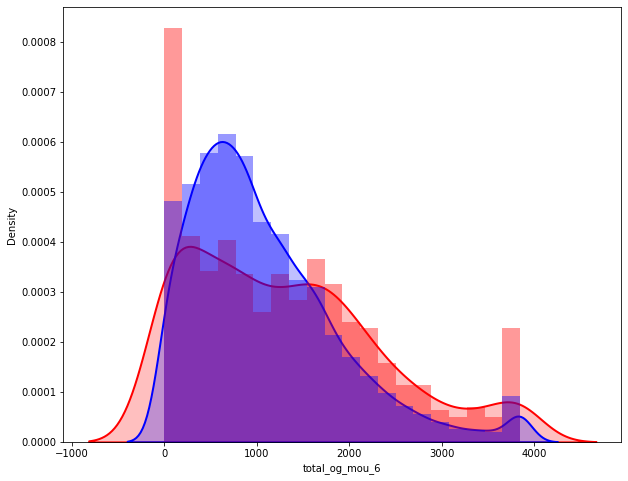

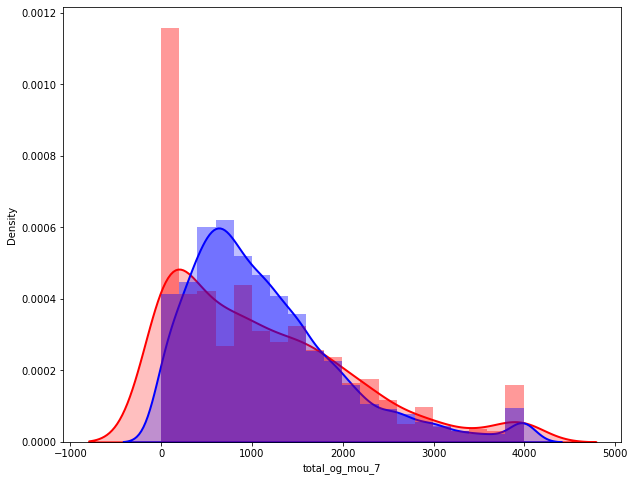

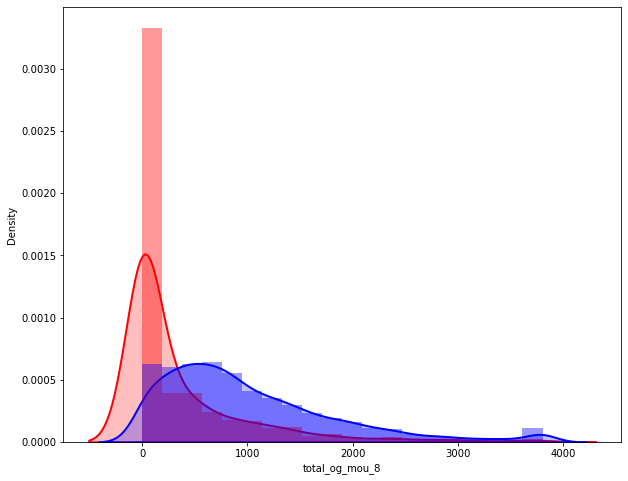

In [107]:
plt_distplot("total_og_mou_6")
plt_distplot("total_og_mou_7")
plt_distplot("total_og_mou_8")

### Mean values of roam incoming and outgoing columns for the last 3 months

In [108]:

df['mean_ic'] = round((df['total_ic_mou_6']+df['total_ic_mou_6']+df['total_ic_mou_8'])/3,2)
df['mean_og'] = round((df['total_og_mou_6']+df['total_og_mou_7']+df['total_og_mou_8'])/3,2)

df['avg_ic_og_mou'] = df['mean_ic'] + df['mean_og']

In [109]:

df['mean_2g_arpu'] = round((df['arpu_2g_6']+df['arpu_2g_7']+df['arpu_2g_8'])/3,2)
df['mean_3g_arpu'] = round((df['arpu_3g_6']+df['arpu_3g_7']+df['arpu_3g_8'])/3,2)

df['avg_2g_3g_arpu'] = df['mean_2g_arpu'] + df['mean_3g_arpu']

In [110]:
df=df.drop(['mean_ic','total_ic_mou_6','total_ic_mou_6','total_ic_mou_8',
         'mean_og','total_og_mou_6','total_og_mou_7','total_og_mou_8',
         'mean_2g_arpu','arpu_2g_6','arpu_2g_7','arpu_2g_8',
         'mean_3g_arpu','arpu_3g_6','arpu_3g_7','arpu_3g_8'],axis=1)

### Feature Selection and Dimesionality Reduction using PCA

In [111]:
print("Shape of DataFrame:",df.shape)
data=df.copy()

Shape of DataFrame: (8975, 144)


In [112]:
num_col=(df.select_dtypes(exclude = "object")).columns

In [113]:
#Standardize the numeric values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[num_col] = scaler.fit_transform(data[num_col])

In [114]:
from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

In [115]:
Y = df["churn"]
X = df.loc[:, df.columns != "churn"]

over = RandomOverSampler(random_state= 0 )
X_over, y_over =over.fit_resample(X,Y)
print("Value Counts Y variable : \n",y_over.value_counts())
print("\nShape of X Variable : \n",X_over.shape)

Value Counts Y variable : 
 1    8153
0    8153
Name: churn, dtype: int64

Shape of X Variable : 
 (16306, 143)


### Train Test Data Spliting

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_over,y_over, test_size=0.3, random_state=42)
print("Shape of Train DataSet:",X_train.shape, Y_train.shape)
print("Shape of Test DataSet:",X_test.shape, Y_test.shape)

Shape of Train DataSet: (11414, 143) (11414,)
Shape of Test DataSet: (4892, 143) (4892,)


### Initializing PCA

In [117]:
#initialize the pca with randomized
start = time.process_time()
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
# fit the training dataset
pca.fit(X_train)
print('Time elapsed {}'.format(time.process_time() - start))

Time elapsed 2.015625


In [121]:
contributions = pca.explained_variance_ratio_
cum_var = pca.explained_variance_ratio_.cumsum()
ncomp = np.argmax(cum_var >= 0.96)+1
print("No. Principal Compoent with 96% of variance is,",ncomp)
pca_final= PCA(n_components = ncomp)
X_train_new=pca_final.fit_transform(X_train)
x_test_new=pca_final.transform(X_test)

No. Principal Compoent with 96% of variance is, 22


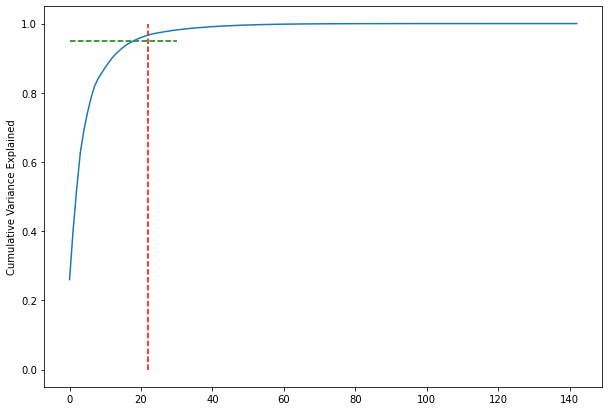

In [122]:
fig = plt.figure(figsize=[10,7])
plt.vlines(x=22, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(cum_var)
plt.ylabel("Cumulative Variance Explained")
plt.show()

In [123]:
# Initialize pca with 25 components
pca = PCA(n_components=25, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


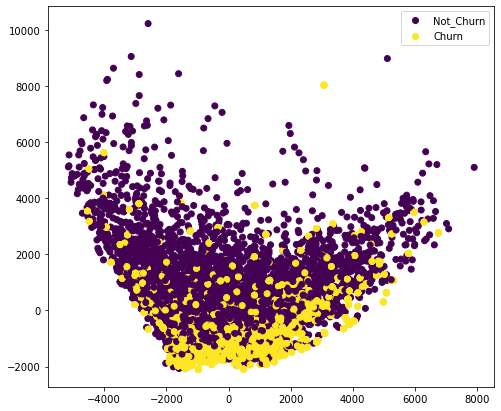

In [124]:
# Xt = pca.fit_transform(X)
fig = plt.figure(figsize=[8,7])
plot = plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=Y_train)
plt.legend(handles=plot.legend_elements()[0], labels=["Not_Churn","Churn"])
plt.show()

In [125]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
        accuracy = np.trace(cm) / np.sum(cm).astype('float')
        misclass = 1 - accuracy
        if cmap is None:
            cmap = plt.get_cmap('Blues')
        plt.figure(figsize=(5,5))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.show()

In [126]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = metrics.accuracy_score(test_labels, predictions)
    recall = metrics.recall_score(test_labels, predictions)
    precision = metrics.precision_score(test_labels, predictions)
    roc_score = metrics.roc_auc_score(test_labels, predictions)
    print('********Model Performance*********')
    print('\nAccuracy = {:0.2f}%.'.format(100*accuracy))
    print('\nPrecision = {:0.2f}%.'.format(100*precision))
    print('\nRecall = {:0.2f}%.'.format(100*recall))
    print('\nROC_AUC_Score = {:0.2f}%.'.format(100*roc_score))
    print(classification_report(test_labels, predictions))
    return accuracy, roc_score, precision, recall

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, classification_report
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_pca,Y_train)
y_pred = logreg.predict(X_test_pca)

In [134]:
log_base_accuracy= evaluate(logreg, X_test_pca, Y_test)

********Model Performance*********

Accuracy = 80.99%.

Precision = 79.90%.

Recall = 82.52%.

ROC_AUC_Score = 81.00%.
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2460
           1       0.80      0.83      0.81      2432

    accuracy                           0.81      4892
   macro avg       0.81      0.81      0.81      4892
weighted avg       0.81      0.81      0.81      4892



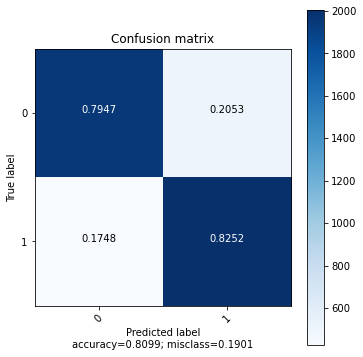

In [146]:
from sklearn.metrics import confusion_matrix
def con_mat(Y_test, y_pred):
    labels = ['churn_Yes', 'churn_No']
    cm=confusion_matrix(Y_test, y_pred)
    plot_confusion_matrix(cm,[0,1])
con_mat(Y_test, y_pred)

#### Our Base Model is predicting False Nagative at 20% rate. This is imporatant emelent for our churn model as we don't want our High value Customer to get churn 

### Implimenting Random Forest Model

In [136]:
start = time.process_time()
rf = RandomForestClassifier(random_state=42, oob_score=True)
model=rf.fit(X_train_pca,Y_train)
y_pred = model.predict(X_test_pca)

rf_base_accuracy = evaluate(model, X_test_pca, Y_test)
print('Time elapsed {}'.format(time.process_time() - start))

********Model Performance*********

Accuracy = 98.04%.

Precision = 96.20%.

Recall = 100.00%.

ROC_AUC_Score = 98.05%.
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2460
           1       0.96      1.00      0.98      2432

    accuracy                           0.98      4892
   macro avg       0.98      0.98      0.98      4892
weighted avg       0.98      0.98      0.98      4892

Time elapsed 4.78125


#### Confucion MAtrix of Random Forest Model

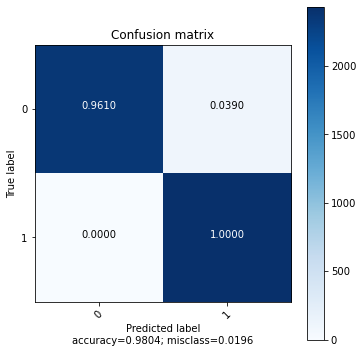

In [137]:
con_mat(Y_test, y_pred)

#### With Random Forest Model We have improved False Negative to 3% and False Positive to 0% 

### Implementing XGBClassifier Model for Comparision  

In [139]:
from xgboost import XGBClassifier

# Initialize the XGBoost
xgb = XGBClassifier(random_state=42)
# fit the pca training data
xgb_model=xgb.fit(X_train_pca, Y_train)
# predict the pca testing data
Y_pred = xgb.predict(X_test_pca)

[22:32:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [140]:
rf_base_accuracy = evaluate(xgb_model, X_test_pca, Y_test)

********Model Performance*********

Accuracy = 97.16%.

Precision = 94.63%.

Recall = 99.96%.

ROC_AUC_Score = 97.17%.
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2460
           1       0.95      1.00      0.97      2432

    accuracy                           0.97      4892
   macro avg       0.97      0.97      0.97      4892
weighted avg       0.97      0.97      0.97      4892



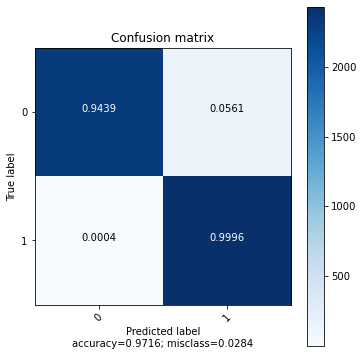

In [144]:
con_mat(Y_test, Y_pred)

#### Somehow Our XGBClassifier has increased our False Negative to 5 % which doesn't seems to be good 

In [147]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.process_time()
GBC = GradientBoostingClassifier(max_features = 0.7, learning_rate = 0.5)

params = {
    'max_depth': [20,50],
   # 'min_samples_leaf': [10,50,100],
    'n_estimators': [20,50,100]
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=GBC,
                           param_grid=params,
                           cv =2,
                           verbose=2, scoring="accuracy")

grid_model=grid_search.fit(X_train_pca,Y_train)
rf_best = grid_search.best_estimator_

print("\nBest Model: ",rf_best)

print("\nGridSerchCV Model Score: {:0.2f}%." .format(grid_search.best_score_*100))

grid_accuracy = evaluate(rf_best,  X_test_pca, Y_test)

print('Time elapsed {}'.format(time.process_time() - start))

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] END ......................max_depth=20, n_estimators=20; total time=   2.2s
[CV] END ......................max_depth=20, n_estimators=20; total time=   2.5s
[CV] END ......................max_depth=20, n_estimators=50; total time=   4.1s
[CV] END ......................max_depth=20, n_estimators=50; total time=   4.6s
[CV] END .....................max_depth=20, n_estimators=100; total time=   4.7s
[CV] END .....................max_depth=20, n_estimators=100; total time=   4.4s
[CV] END ......................max_depth=50, n_estimators=20; total time=   2.0s
[CV] END ......................max_depth=50, n_estimators=20; total time=   2.2s
[CV] END ......................max_depth=50, n_estimators=50; total time=   3.9s
[CV] END ......................max_depth=50, n_estimators=50; total time=   3.9s
[CV] END .....................max_depth=50, n_estimators=100; total time=   4.1s
[CV] END .....................max_depth=50, n_est

In [155]:
grid_model=rf_best.fit(X_train_pca,Y_train)
y_pred = grid_model.predict(X_test_pca)
y_pred_proba = grid_model.predict_proba(X_test_pca)

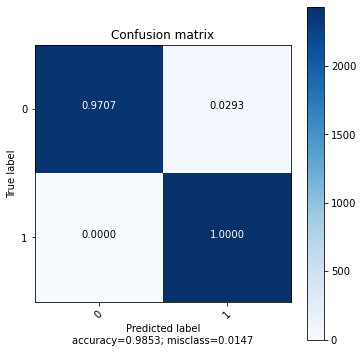

In [156]:
con_mat(Y_test, y_pred)

#### Grid Model also incresed False Negative to 2% 

### Using RandomForest for final Prediction 
#### Recall : Churn Correctly Identified /(Churn Correctly Identified + Churn Incorrectly labeled as not Churn)
#### Precision : Churn Correctly Identified /(Churn Correctly Identified + Not Churn Incorrectly labeled as Churn)
The Objective here is to identify high value users whoes probabilty of getting churn 
Higher proportion of labeling Churn user to Non Churn compared to Non Churn Incorrectly abeling as Churn. It can definatly create an loss for telecom company 
Hence with the trade off between Recall and Precision we can go ahead with Grid Model

In [161]:
final_model=model.fit(X_train_pca,Y_train)
Y_pred = final_model.predict(X_test_pca)


In [162]:
from sklearn.metrics import roc_curve, roc_auc_score 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

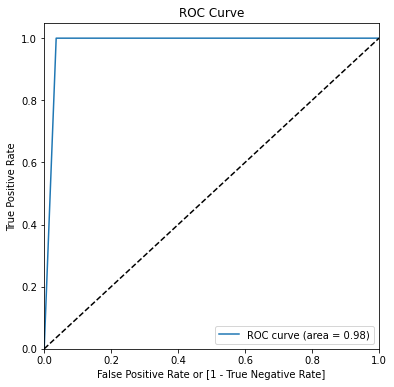

In [163]:
draw_roc(Y_test, Y_pred)

### Prediction Probability

In [164]:
Y_pred_final = pd.DataFrame({'actual':Y_test,'pred_nonchurn_prob':y_pred_proba[:,0],'pred_churn_prob':y_pred_proba[:,1],'predicted':y_pred})
Y_pred_final.head(5)

,actual,pred_nonchurn_prob,pred_churn_prob,predicted
10127,1,6.073288e-09,1.000000e+00,1
12970,1,7.515298e-09,1.000000e+00,1
2638,0,1.000000e+00,2.210894e-08,0
1123,0,3.739564e-01,6.260436e-01,1
9825,1,2.848834e-08,1.000000e+00,1


### Feature Importance Score

In [166]:
model = RandomForestClassifier()
predictor = model.fit(X_train, Y_train)

In [168]:
imp_feature = pd.DataFrame({'Feature':X_train.columns, 'Imp':model.feature_importances_})
imp_feature_df = imp_feature.sort_values('Imp', ascending=False).reset_index()
imp_feature_df.head(20)

,index,Feature,Imp
0,90,total_rech_amt_8,0.049376
1,14,roam_og_mou_8,0.048832
2,11,roam_ic_mou_8,0.048157
3,29,loc_og_mou_8,0.043939
4,17,loc_og_t2t_mou_8,0.043110
5,2,arpu_8,0.042603
6,96,last_day_rch_amt_8,0.036262
7,53,loc_ic_t2t_mou_8,0.033720
8,56,loc_ic_t2m_mou_8,0.025524
9,62,loc_ic_mou_8,0.024768


### Inferences: 
    1. Roaming outgoing and icoming minutes of usage used are by user has an important part, hence Telecom compnay needs 
    to revisit rates of Roaming calls
    2. Total Recharge done in previous period plays an important role in Custometr Churn.
    3. Local Outgoing call within same Operator has also one of the important indicator towards customer churn.
    4. Avg Revenue by user is also important fator towards Customer churn, which Telecom Company can track to avoide 
    Customer getting churn
    5. Last recharge amount in 8th month can gives intuation of customer getting churn in 9th Month
    
### Conclusion :
    1. If number of calls are started getting reduce, may be a sign of customer trying to switch from to another network
    2. Significant Reduction in recharge ammount is a significant indication of Churn 
    3. If User only utilizing incoming call service might be a chance of churn or already using some other network for data and outgoing call services